<a href="https://colab.research.google.com/github/deshaami/K_MEANS/blob/main/K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd
!ls

/content
drive  sample_data


In [ ]:
%cd /content/drive/MyDrive/AI_Lab

[Errno 2] No such file or directory: '/content/drive/MyDrive/AI_Lab'
/content


In [ ]:
!ls

Dataset.csv  Experiment_3.ipynb


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv("Dataset.csv")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income ')

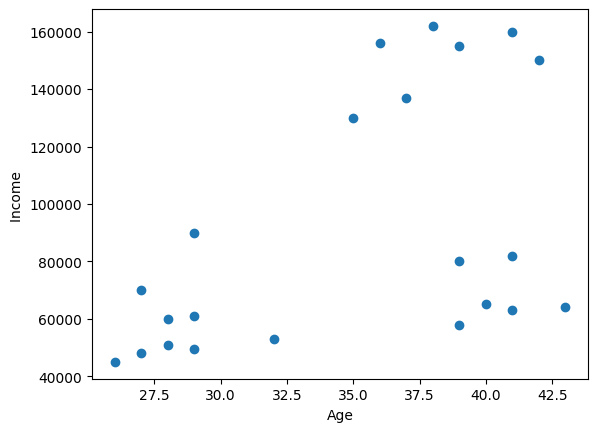

In [ ]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income ')

In [ ]:
km = KMeans(n_clusters=3)
km


KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


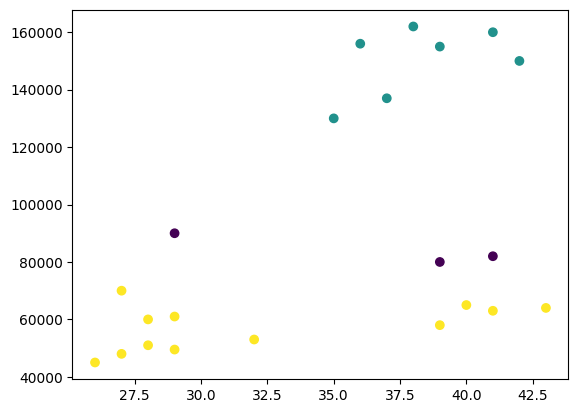

In [ ]:
plt.scatter(df.Age,df['Income'],c=df.cluster)

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.drop('cluster',axis='columns',inplace=True)
df.head()

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [ ]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

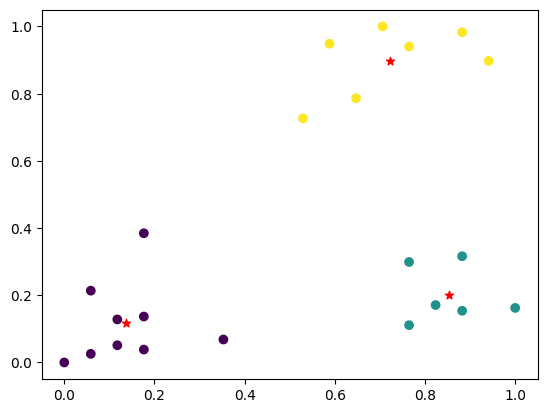

In [ ]:
plt.scatter(df.Age,df['Income'],c=df.cluster)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

In [ ]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3698658919234834,
 0.2860717106689441,
 0.23929417435243613,
 0.2868435777838229,
 0.1469445544006364,
 0.11612804668175383]

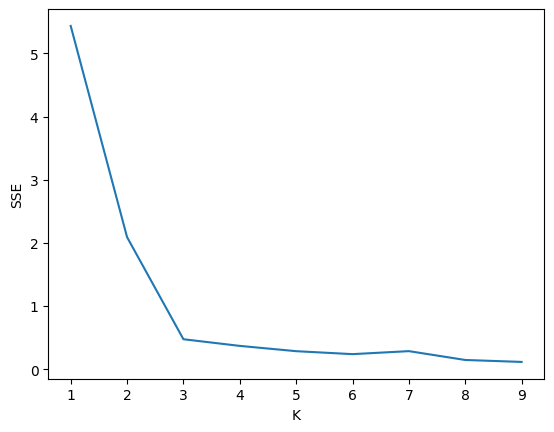

In [ ]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)